# MolStandardize

This is a demonstration on how to use the MolVS MolStandardize functionality within RDKit. The modules and structure remain largely the same as MolVS, just the naming has changed.
https://molvs.readthedocs.io/en/latest/

In [21]:
import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import MolStandardize

MolStandardize contains the following modules, that allow you to develop your custom standardization process.
-  MolStandardize.standardize
-  MolStandardize.normalize
-  MolStandardize.metal
-  MolStandardize.tautomer
-  MolStandardize.fragment
-  MolStandardize.charge
-  MolStandardize.validate
-  MolStandardize.validations
-  MolStandardize.cli
-  MolStandardize.errors

## standardize_smiles

The __standardize_smiles()__ function contains all sensible default functionality to help get started

In [56]:
from rdkit.Chem.MolStandardize.standardize import standardize_smiles
sm = "[Na]OC(=O)c1ccc(C[S+2]([O-])([O-]))cc1"
standardize_smiles(sm)

'O=C([O-])c1ccc(C[S](=O)=O)cc1.[Na+]'

In [57]:
from rdkit.Chem.MolStandardize import standardize

The __standardize_smiles()__ function performs the following steps.

In [65]:
mol = Chem.MolFromSmiles(sm)
Chem.SanitizeMol(mol)
mol = Chem.RemoveHs(mol)
s = standardize.Standardizer()
mol = s.disconnect_metals(mol)
mol = s.normalize(mol)
mol = s.reionize(mol)
Chem.AssignStereochemistry(mol, force=True, cleanIt=True)
Chem.MolToSmiles(mol)

'O=C([O-])c1ccc(C[S](=O)=O)cc1.[Na+]'

## MolStandardize.validate

The __validate_smiles()__ function is a convenient way to quickly validate a single SMILES string. It returns a list of log messages as strings

In [12]:
from rdkit.Chem.MolStandardize.validate import validate_smiles
validate_smiles("O=C([O-])c1ccccc1")

['INFO: [NeutralValidation] Not an overall neutral system (-1)']

The __Validator__ class provides more flexibility when working with multiple molecules or when a custom __Validation__ list is required

In [17]:
from rdkit.Chem.MolStandardize import Validator
fmt = '%(asctime)s - %(levelname)s - %(validation)s - %(message)s'
validator = Validator(log_format=fmt)
mol = Chem.MolFromSmiles('[2H]C(Cl)(Cl)Cl')
validator.validate(mol)

['2018-07-25 11:13:21,541 - INFO - IsotopeValidation - Molecule contains isotope 2H']

## MolStandardize.standardize

Whilst __standardize_smiles()__ provides a quick and easy way to get standardized version of a SMILES string, it's inefficient when dealing with multiple molecules and doesn't allow customization of the standardize process.

The __Standardizer__ class provides flexibility to specify custom standardization stages and efficiently standardize multiple molecules.

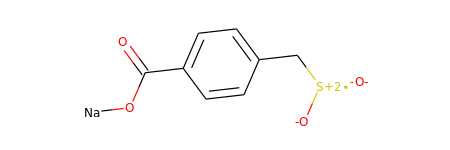

In [23]:
from rdkit.Chem.MolStandardize import Standardizer
mol = Chem.MolFromSmiles("[Na]OC(=O)c1ccc(C[S+2]([O-])([O-]))cc1")
mol

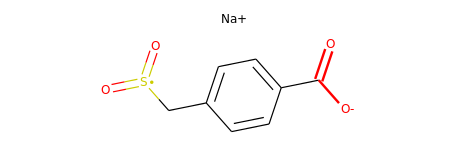

In [24]:
s = Standardizer()
smol = s.standardize(mol)
smol

## MolStandardize.normalize

The __Normalizer__ class is used to apply a series of Normalization transforms to correct functional groups and recombine charges.

In [51]:
from rdkit.Chem.MolStandardize.normalize import Normalizer

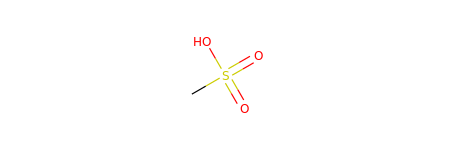

In [53]:
n = Normalizer()
n.normalize(Chem.MolFromSmiles("C[S+2]([O-])([O-])O"))

## MolStandardize.metal

The __MetalDisconnector__ class disconnects metal atoms that are defined as covalently bonded to non-metals.

In [54]:
from rdkit.Chem.MolStandardize.metal import MetalDisconnector

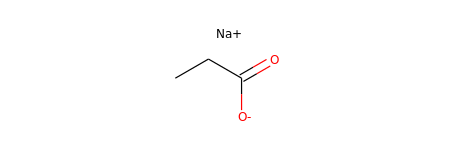

In [55]:
md = MetalDisconnector()
md.disconnect(Chem.MolFromSmiles("CCC(=O)O[Na]"))

##  MolStandardize.tautomer

-  __Tautomer_enumeration__ generates all possible tautomers using a series of transform rules. It also removes stereochemistry from double bonds that are single in at least 1 tautomer.
-  __Tautomer_canonicalization__ enumerates all possible tautomers using transform rules and uses a scoring system to determine canonical tautomer.

In [25]:
from rdkit.Chem.MolStandardize.standardize import enumerate_tautomers_smiles, canonicalize_tautomer_smiles

In [26]:
enumerate_tautomers_smiles("OC(C)=C(C)C")

{'C=C(O)C(C)C', 'CC(=O)C(C)C', 'CC(C)=C(C)O'}

In [27]:
canonicalize_tautomer_smiles("OC(C)=C(C)C")

'CC(=O)C(C)C'

## MolStandardize.fragment

-  __LargestFragmentChooser__ gets the largest fragment
-  __FragmentRemover__ filters out fragments

In [28]:
from rdkit.Chem.MolStandardize.fragment import LargestFragmentChooser, FragmentRemover

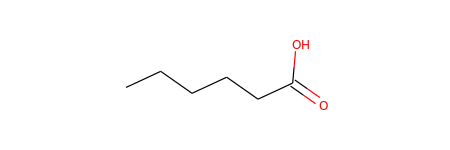

In [31]:
lfc = LargestFragmentChooser()
lfc.choose(Chem.MolFromSmiles("O=C(O)CCC.O=C(O)CCCC.O=C(O)CCCCC.O=C(O)CCCC"))

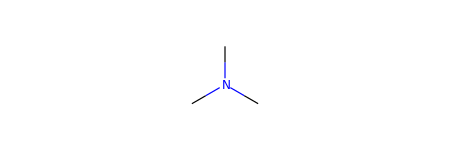

In [32]:
fr = FragmentRemover()
fr.remove(Chem.MolFromSmiles("CN(C)C.Cl.Cl.Br"))

## MolStandardize.charge

-  __Reionizer__ ensure the strongest acid groups ionize first in partially ionized molecules.
-  __Uncharger__ attempts to neutralize charges by adding and/or removing hydrogens where possible.


__charge_parent()__ is the uncharged version of the fragment parent. It involves taking the fragment parent then applying __Neutralize__ and __Reionize__.

In [33]:
from rdkit.Chem.MolStandardize.charge import Reionizer, Uncharger

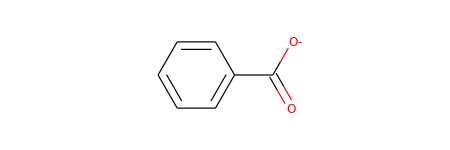

In [48]:
mol = Chem.MolFromSmiles("[Na+].O=C([O-])c1ccccc1")

lfc = LargestFragmentChooser()
mol = lfc.choose(mol)
mol

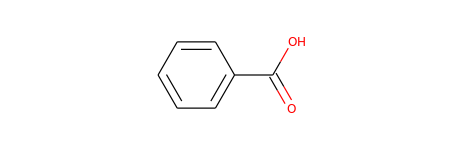

In [49]:
u = Uncharger()
mol = u.uncharge(mol)
mol

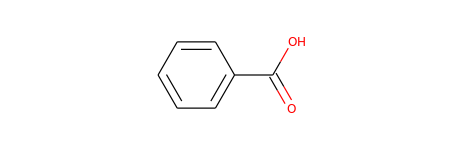

In [50]:
r = Reionizer()
mol = r.reionize(mol)
mol

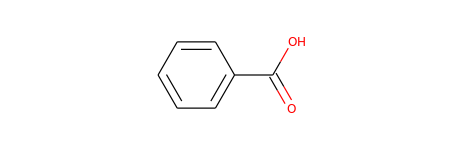

In [44]:
mol = Chem.MolFromSmiles("[Na+].O=C([O-])c1ccccc1")
s.charge_parent(mol)